# PROJETO 1 - Ciência dos Dados

**Nome**: Igor Figueiredo
<br> **Turma**: 2A

## Introdução

<p style='text-align:justify;'> O objetivo desta análise é identificar se existe associação entre três variáveis distintas de livre escolha. Para isso, com a intenção de responder uma pergunta definida tambêm por livre escolha, porem associada a uma Organização Nacional, as variáveis: Investimento direto estrangeiro (% do PIB), estoque de migração internacional e	percentagem de trabalhadores assalariados foram escolhidos. Dessa forma, tais variáveis serão avaliadas em 6 regiões diferentes, sendo 3 delas países que entraram na União Européia durante o ano de 2004 e os outros 3, países que não entraram na organização até hoje.

## Pergunta a ser respondida

<p style='text-align:justify;'> Uma vez que o País entra na União Européia, a disponibilidade de mão de obra passa a aumentar em razão do aumento da imigração provocado por maiores investimento nos países desenvolvidos?

## Explicação da hipótese e mecanismo

**Hipótese**:
<p style='text-align:justify;'> 
Uma vez que o páis entra na União Européia, tanto a taxa de imigração quanto de trabalhadores assalariados aumentam em função do investimento ao estrangeiro.

**Mecanismo**: 
<p style='text-align:justify;'> 
    Apresentando um caráter único, os países que compõem a União Européia (UE) congregaram suas soberanias em algumas áreas para ganhar força e influência no mundo, as quais não poderiam obter isoladamente.
Sendo assim, a ideia da Europa como uma unidade política e econômica tem pelo menos um século de existência. Mas foi apenas depois da assinatura do Tratado de Roma, de 1957, que essa proposta começou a se consolidar com a finalidade de garantir a livre circulação de mercadorias, serviços e pessoas entre seus membros, eliminando os obstáculos, alfandegários ou não, que impediam o livre comércio. 
    <br> Como citado em  uma notícia da "Wharton University of Pennsylvania", "O aspecto positivo da crise migratória pode se dar sob a forma de ganhos de longo prazo para os países que acomodem os refugiados e proporcionem a eles oportunidades de empreendedorismo e de criação de empregos, conforme explica Robert Meyer, professor de marketing e também diretor de Riscos e de Processos de Decisão da Wharton. (...) Inúmeras evidências mostram que o imigrante refugiado contribui, com frequencia, de forma positiva com as economias"
    <br> Dessa forma, uma vez que se está na União Européia, maior é a tendência de aumento do investimento para estrangeiros no País, permitindo, dessa forma, um maior fluxo migratório à procura de mão de obra neste.


## Bases de dados 

**Base de dados sobre União Europeia** 
<ul>
<li><a> https://pt.wikipedia.org/wiki/União_Europeia </a></li>
    <li><a> https://europa.eu/european-union/index_pt </a></li>
    <p> Artigo que embasa o mecanismo do projeto </p>
    <li><a> http://www.knowledgeatwharton.com.br/article/a-crise-dos-imigrantes-na-europa-equilibrando-riscos-com-ganhos-de-longo-prazo/ </a></li>
    </ul>

**Base de dados excel**:
<ul>
    <li> Dados sobre Investimento direto estrangeiro (% do PIB): </li>
    <a> http://data.worldbank.org/indicator/BM.KLT.DINV.GD.ZS";"http://data.worldbank.org/indicator/BM.KLT.DINV.GD.ZS </a>
    <li> Dados sobre percentagem de trabalhadores assalariados e estoque de migração internacional:
        <br><a> https://www.gapminder.org/data/ </a>
</ul>    

## Análise de dados

<h2> PROGRAMAÇÃO E SELEÇÃO DE DADOS: </h2>
Analisando os dados disponíveis

In [5]:
# Importando bibliotecas

%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [6]:
# Definindo o diretório:

meu_diretorio = "/Users/Figueiredo/Documents/Insper/2º semestre/Ciência dos dados/Projetos/Projeto 1/Planilhas Excel"
os.chdir(meu_diretorio)
print('Esperamos trabalhar no diretório:')
print(os.getcwd())

Esperamos trabalhar no diretório:
/Users/Figueiredo/Documents/Insper/2º semestre/Ciência dos dados/Projetos/Projeto 1/Planilhas Excel


In [7]:
# Leitura dos arquivos em Excel

Investimento_estrangeiro_Outflow  = pd.read_excel('Foreign direct investment, net outflows (% of GDP).xlsx')
Porcent_trabalhadores             = pd.read_excel("salaried_workers_percent_of_non_agricultural_employment-2.xlsx")
imigração                         = pd.read_excel("sm_pop_totl_zs.xlsx")

<p style='text-align:justify;'> Como citado anteriormente na introdução, o foco do trabálho estará relacionado a responder as perguntas conforme as análises das variávies para Malta, Eslovênia, Hungria, Japão, México e Argentina, como mostrado na tabela abaixo.

In [10]:
imigração_index = imigração.set_index("country")

paises_na_EU = []
paises_EU = ["France", "Germany", "Belgium", "Italy", "Luxembourg", "Netherlands", "Denmark", "Ireland", "United Kingdom", "Greece", "Portugal", "Spain", "Austria", "Finland", "Sweden", "Hungary", "Cyprus", "Czech Republic", "Estonia", "Latvia", "Lithuania", "Malta", "Poland", "Slovak Republic", "Slovenia", "Bulgaria", "Romania", "Croatia"]
for pais in imigração["country"]:
    if pais in paises_EU:
        paises_na_EU.append("sim")
    else:
        paises_na_EU.append('não')
imigração_index["Está na EU"] = paises_na_EU

Quali = imigração_index.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],["Está na EU"]]
Quali

,Está na EU
country,
Malta,sim
Slovenia,sim
Hungary,sim
Japan,não
Mexico,não
Argentina,não


<p style='text-align:justify;'> Sendo assim, a tabela, além de separar os países a serem analisados, também classifica-os como pertencentes, ou não, a UE. Além disso, é importante evidenciar que, como o propósito do trabalho é ver a relação das três variáveis com a entrada do País na UE, o intervalo de tempo a ser analisado ao decorrer do projeto esta relacionado a um período médio de 5 anos antes e depois da entrada da Eslovênia, Hungria e Malta na Organização (2004).

### Analisando o Investimento direto estrangeiro

<p style='text-align:justify;'> A primeira variável a ser analisada é o Investimento direto estrangeiro (% do PIB) para os Países amostrais, de forma a analisar, dentro de um imtervalo de tempo, se houve um aumento ou uma variação brusca do investimento para, logo após, correlacionar tal variável com o aumento da taxa de imigração. 

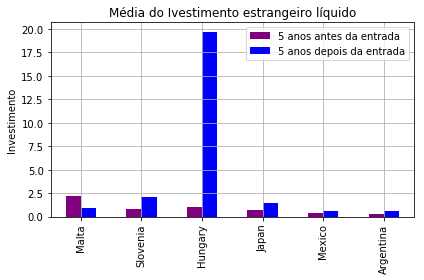

In [23]:
Investimento_estrangeiro_Outflow_index = Investimento_estrangeiro_Outflow.set_index("Foreign direct investment, net outflows (% of GDP)")
inv1 = Investimento_estrangeiro_Outflow_index.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
inv = inv1.rename_axis('country').rename_axis('', axis='columns')

inv_antes = Investimento_estrangeiro_Outflow_index.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],['1999','2000','2001','2002','2003','2004']]
inv_antes_m = inv_antes.transpose().mean()
inv_antes_m

inv_depois = Investimento_estrangeiro_Outflow_index.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],['2004','2005','2006','2007','2008','2009']]
inv_depois_m = inv_depois.transpose().mean()
inv_depois_m
media = {"Malta":[2.209607,0.936258],"Slovenia":[0.849792,2.119707],"Hungary":[0.996807,19.702596],"Japan":[0.715788,1.443728],"Mexico":[0.401867,0.608136],"Argentina":[0.235184,0.588448]}
dados_media = pd.DataFrame.from_dict(media, orient = "index", columns = ["5 anos antes da entrada","5 anos depois da entrada"])

dados_media.plot(kind = 'bar', color = ("purple","blue"))
plt.ylabel("Investimento")
plt.title('Média do Ivestimento estrangeiro líquido')
plt.grid()
plt.tight_layout()

<p style='text-align:justify;'> Sendo assim, após fazer uma média dos investimentos para os 5 anos anteriores da entrada dos países analisados, na UE e 5 anos depois, oberva-se que em relação aos outros países, os países pertencentes a UE, apresentam um crescimento significativo do investimento líquido ao estrangeiro (mais de 100% do investimento de 5 anos antes), com excessão de Malta; no qual pode ser explicado por um investimento brusco de 11.516652% no ano de 2003 (um ano anterior a entrada do país na UE, o que representa uma possível influência para entrada deste na organização), alterando significativamente a média do investimento ao estrangeiro para 5 anos anteriores a sua entrada.

### Analisando a taxa de Imigração

<p style='text-align:justify;'> Uma vez analisado a primeira variável, a segunda variável a ser estudada é a taxa de imigração para os País amostrais, de forma a investigar novamente, dentro de um imtervalo de tempo, se houve uma variação brusca ou não da taxa de imigração podendo, dessa forma, correlacionar tal variável com o aumento de investimento ao estrangeiro. Comprovando assim, a primeira parte do mecanismo proposto acima.

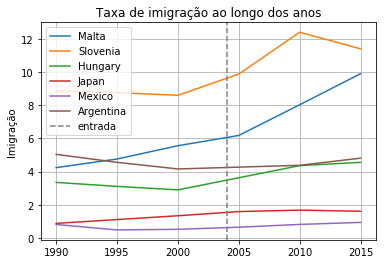

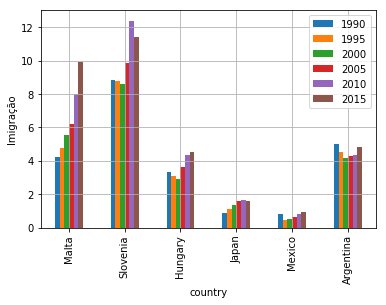

In [21]:
pais=["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"]
anos=[1990,1995,2000,2005,2010,2015]
for i in pais:
    plt.plot(imigração_index.loc[i,anos], label=i)
plt.grid()
plt.axvline(x=2004, color = "grey", linestyle = "--", label = "entrada")
plt.legend()
plt.ylabel("Imigração")
plt.title("Taxa de imigração ao longo dos anos")
plt.show()
img = imigração_index.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],[1990,1995,2000,2005,2010,2015]]
img.plot(kind="bar")
plt.ylabel("Imigração")
plt.grid()

<p style='text-align:justify;'> Ambos os dados analisados acima demonstram, para uma série temporal, a taxa de imigração anual para cada País analisado. Sendo assim, é possivel observar uma elevada variação de imigração para os países pertencentes a UE logo após seu ano de entrada na Organização (2004). Fator que, por sua vez, se comprova no gráfico abaixo, responsável por descrever as mesma informações, porém apenas para as médias de um intervalo de tempo de 10 anos antes e depois da entrada.

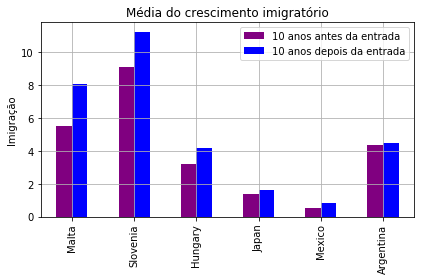

In [43]:
media = {"Malta":[5.500000,8.036667],"Slovenia":[9.080000,11.226667],"Hungary":[3.213333,4.183333],"Japan":[1.346667,1.626667],"Mexico":[0.552667,0.801667],"Argentina":[4.330000,4.486667]}
dados_media = pd.DataFrame.from_dict(media, orient = "index", columns = ["10 anos antes da entrada","10 anos depois da entrada"])

dados_media.plot(kind = 'bar', color = ("purple","blue"))
plt.ylabel("Imigração")
plt.title('Média do crescimento imigratório')
plt.grid()
plt.tight_layout()

### Correlacionado o Investimento estrangeiro com o estoque de imigração

In [46]:
x = inv.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],['2004']]
y = img.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],[2005]]


data = x.join(y)
v = data.columns = ['2004_Investimento direto estrangeiro (% do PIB)', '2005_Estoque de migração internacional']
data

,2004_Investimento direto estrangeiro (% do PIB),2005_Estoque de migração internacional
country,,
Malta,0.130620,6.180
Slovenia,1.625108,9.880
Hungary,1.094550,3.630
Japan,0.672129,1.590
Mexico,0.583316,0.649
Argentina,0.441450,4.270


<p style='text-align:justify;'> A tabela abaixo representa apenas um passo anterior para a realização da correlação entre as duas variáveis, no qual representa a seleção dos dados nescessário para tal processo. Além disso, é importante ressaltar que por se tratar de um investimento, o resultado esperado é observado a um período de longo prazo, explicando, portanto, a selção dos anos analizados acima no qual foi selecionado o ano de 2004 para o investimento estrangeiro e 2005 para o estoque de imigração.

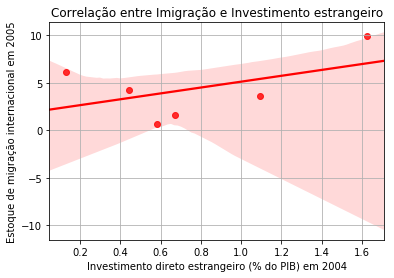

Correlação: 0.4887279680810669



,2004_Investimento direto estrangeiro (% do PIB),2005_Estoque de migração internacional
2004_Investimento direto estrangeiro (% do PIB),1.000000,0.488728
2005_Estoque de migração internacional,0.488728,1.000000


In [47]:
cor=data.corr()

sns.regplot(data['2004_Investimento direto estrangeiro (% do PIB)'], data['2005_Estoque de migração internacional'], color=('red'))
plt.xlabel('Investimento direto estrangeiro (% do PIB) em 2004')
plt.ylabel('Estoque de migração internacional em 2005')
plt.grid()
plt.title("Correlação entre Imigração e Investimento estrangeiro")
plt.show()

print("Correlação: {}\n".format(cor['2004_Investimento direto estrangeiro (% do PIB)']['2005_Estoque de migração internacional']))



cor

<p style='text-align:justify;'> Uma vez que que é feito a correlação entre as duas variáveis, é possivel mencionar que há de fato uma relação entre ambas, porém o fato deste ser aproximadamente 0,5 pode ser explicado pela relação entre o estoque de imigração e a taxa de investimento líquido para o estrangeiro não ser exclusivo. Ou seja, o estoque de imigração apresenta todos os indivíduos que migraram para um país, entretanto, não envolve unicamente e exclusivamente apenas aqueles que migraram devido o incentivo por meio do investimento aoestrangeiro. Sendo assim, é possível concluir que, apesar de uma parte da população migrar para outros países a procura de uma melhor qualidade de vida devido o investimento estrangeiro, este não representa a maior parte da população migratória nos países analisados.

### Analisando número de trabalhadores assariados

<p style='text-align:justify;'> Uma vez que não se observou uma alta correlação entre as variáveis analisadas acima, é possível introduzir uma nova variável no sistema, sendo esta o número de trabalhadores assalariados. Sendo assim, após conlcuir que a maior parte da população migra para outros países a procura de outros fatores do que uma melhor qualidade de vida, é possível verificar se o motivo desta imigração esta correlacionada com a procura de emprego.

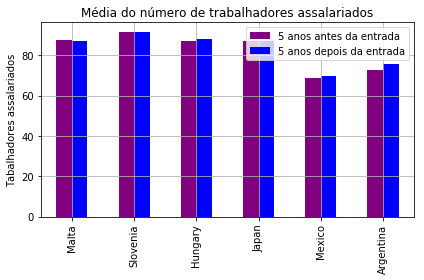

In [48]:
Porcent_trabalhadores_index = Porcent_trabalhadores.set_index("country")
pt = Porcent_trabalhadores_index.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017]]

pt_antes = Porcent_trabalhadores_index.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],[1999,2000,2001,2002,2003,2004]]
pt_antes_m = pt_antes.transpose().mean()
pt_antes_m

pt_depois = Porcent_trabalhadores_index.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],[2004,2005,2006,2007,2008,2009]]
pt_depois_m = pt_depois.transpose().mean()
pt_depois_m

media = {"Malta":[87.580000,86.900000],"Slovenia":[91.416667,91.733333],"Hungary":[87.216667,88.083333],"Japan":[87.180000,87.180000],"Mexico":[68.766667,69.950000],"Argentina":[72.766667,75.580000]}
dados_media = pd.DataFrame.from_dict(media, orient = "index", columns = ["5 anos antes da entrada","5 anos depois da entrada"])

dados_media.plot(kind = 'bar', color = ("purple","blue"))
plt.ylabel("Tabalhadores assalariados")
plt.title('Média do número de trabalhadores assalariados')
plt.grid()
plt.tight_layout()

<p style='text-align:justify;'>O gráfico acima descreve a média de trabalhadores assalariados 5 anos antes e depois da entrada da Eslovênia, Hungria e Malta na UE. Sendo assim, analizando o gráfico, não é possível identificar uma brusca diferença entre o número de trabalhadores, em um país, antes e depois da entrada deste na UE.

### Correlacionado o Estoque de imigração com o número de trabalhadores assalariados

<p style='text-align:justify;'> Analogamente ao processo acima, o objetico da correlação é ferificar se existe uma correlação direta entre a taxa de imigração de um país e o número de trabalhadores assalariados deste. Sendo assim, analogamente ao processo realizado acima, chega-se na seguinte correlação entre as duas variáveis:

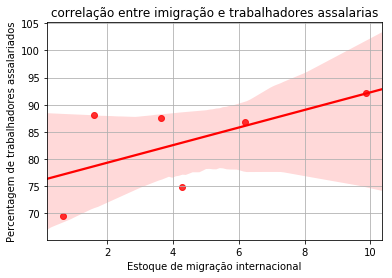

Correlação: 0.6121033980343373



,Investimento direto estrangeiro (% do PIB),Estoque de migração internacional,Percentagem de trabalhadores assalariados
Investimento direto estrangeiro (% do PIB),1.000000,0.488728,0.490297
Estoque de migração internacional,0.488728,1.000000,0.612103
Percentagem de trabalhadores assalariados,0.490297,0.612103,1.000000


In [85]:
w = pt.loc[["Malta", "Slovenia", "Hungary","Japan","Mexico","Argentina"],[2005]]
data2 = data.join(w)
h = data2.columns = ['Investimento direto estrangeiro (% do PIB)','Estoque de migração internacional', 'Percentagem de trabalhadores assalariados']
cor=data2.corr()

sns.regplot(data2['Estoque de migração internacional'], data2['Percentagem de trabalhadores assalariados'], color=('red'))
plt.xlabel('Estoque de migração internacional')
plt.ylabel('Percentagem de trabalhadores assalariados')
plt.title("correlação entre imigração e trabalhadores assalarias")
plt.grid()
plt.show()

print("Correlação: {}\n".format(cor['Estoque de migração internacional']['Percentagem de trabalhadores assalariados']))



cor

Realizando o mesmo processo para apenas os países pertencentes a UE, obtem-se a correlação abaixo.

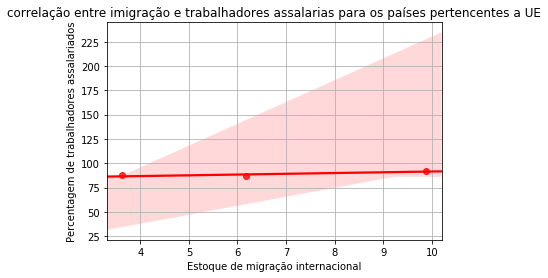

Correlação: 0.8661185999497515



,Estoque de migração internacional,Percentagem de trabalhadores assalariados
Estoque de migração internacional,1.000000,0.866119
Percentagem de trabalhadores assalariados,0.866119,1.000000


In [79]:
i = img.loc[["Malta", "Slovenia", "Hungary"],[2005]]
j = i.columns = ['Estoque de migração internacional']
h = pt.loc[["Malta", "Slovenia", "Hungary"],[2005]]
f = h.columns =['Percentagem de trabalhadores assalariados']

data4 = i.join(h)

cor=data4.corr()

sns.regplot(data4['Estoque de migração internacional'], data4['Percentagem de trabalhadores assalariados'], color=('red'))
plt.xlabel('Estoque de migração internacional')
plt.ylabel('Percentagem de trabalhadores assalariados')
plt.title("correlação entre imigração e trabalhadores assalarias para os países pertencentes a UE")
plt.grid()
plt.show()

print("Correlação: {}\n".format(cor['Estoque de migração internacional']['Percentagem de trabalhadores assalariados']))



cor

### Conclusão

<p style='text-align:justify;'>Após realizar a correlação entre a taxa de imigração anual e o número de trabalhadores assalariados é possível dizer que, ao contrario da correlação encontrada anteriormente, existe uma correlação maior e mais definida entre a taxa de imigração e o número de trabalhadores assalariados do que entre a taxa de imigração e o investimento líquido ao estrangeiro. Sendo assim, tendo em mente a conclusão feita acima a partir da primeira correlação, é possível dizer que o investimento não provoca, necessariamente a imigração, mas sim que existe uma média relação entre o número de trabalhadores assalariados e a taxa de imigração anual no país, indicando, dessa forma, que uma grande parte do número de imigrantes entre os países ocorre a procura de trabalho. Tal relação, por sua vez, torna-se extrememante alta uma vez que são analizados apenas os países pertencentes a UE. Dessa forma, é possivel dizer que uma vez que o País entrou na UE, maior foi a taxa de imigração a procura de mão de obra.